# IMPORTS AND SETTINGS

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 100%; }
    div#maintoolbar-container { width: 100%; }
</style>
"""))

In [2]:
import pandas as pd
idx = pd.IndexSlice
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 700)
import os
import semopy #SEM package
import graphviz 
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"

In [3]:
project_folder=os.sep.join(os.getcwd().split(os.sep)[:-1])
project_folder

'C:\\Andrea\\Tutoring\\Teaching Statistics\\Jack Hui'

In [4]:
data_folder=os.path.join(project_folder,"data")
data_folder

'C:\\Andrea\\Tutoring\\Teaching Statistics\\Jack Hui\\data'

# SCRIPT

## DATA LOADING

In [5]:
data_file_name=[file for file in os.listdir(data_folder) if file[0]!="~" and "Summary of the reading" in file][0]
df=pd.read_excel(os.path.join(data_folder,data_file_name), sheet_name="Questionnaire (2)", index_col=0, header=[0,1])
df=df.loc[:,df.columns[:list(df.columns.get_level_values(1)).index("Reputation")+1]]

#renaming columns
new_columns=[]
j=1
for col in df.columns:
    if col[0]=="Governmental Influence":
        col=("Governmental Influence","Governmental_Influence_"+str(j))
        j+=1
        new_columns.append(col)
        continue
    if col[0]!="Control":
        col1_new=col[1]
        col1_new=col1_new.split(".")
        if len(col1_new)==1:
            col1_new=col1_new+[0]
        col1_new=col1_new[0]+"_"+str(int(col1_new[1])+1)
        new_columns.append((col[0], col1_new))
    else:
        new_columns.append(col)

df.columns=pd.MultiIndex.from_arrays([[c[0] for c in new_columns], [c[1] for c in new_columns]], names=('variable', 'mesaurement'))
df.rename(columns={"Reputation_1":"Reputation", "Type of Industry":"Type_Industry"}, inplace=True)
df

variable     Control                                                \
mesaurement Location Type_Industry Employee Age Position Structure   
1                  2             2        2   4        4         1   
2                  2             3        3   3        1         2   
3                  3             4        3   4        4         1   
4                  2             2        2   2        3         1   
5                  3             2        3   4        4         1   
6                  1             2        2   3        3         1   
7                  1             3        4   2        3         2   
8                  2             1        1   4        1         2   
9                  2             3        2   4        2         1   
10                 2             1        3   2        2         2   
11                 3             3        4   4        3         1   
12                 3             4        1   2        5         2   
13                 1             4        2   3        3         2   
14                 2             2        1   2        1         1   
15                 1             3        1   4        2         2   
16                 2             2        4   4        1         1   
17                 1             3        2   4        2         2   
18                 3             3        3   2        1         2   
19                 3             4        4   4        5         1   
20                 1             1        1   4        3         1   
21                 3             4        4   4        2         2   
22                 3             3        4   2        1         1   
23                 3             4        1   3        1         1   
24                 2             3        3   4        2         1   
25                 3             1        1   2        2         2   
26                 3             1        4   3        3         2   
27                 2             2        3   4        2         1   
28                 2             1        2   2        5         2   
29                 2             3        3   4        5         1   
30                 1             1        4   4        4         2   
31                 1             3        4   3        4         2   
32                 1             1        2   2        5         2   
33                 2             3        3   3        2         2   
34                 3             2        1   3        4         2   
35                 1             1        2   2        4         1   
36                 2             3        2   2        1         2   
37                 1             1        2   2        5         1   
38                 1             2        3   2        2         1   
39                 3             1        2   3        5         2   
40                 2             4        3   3        5         2   
41                 3             4        4   2        3         1   
42                 2             2        3   3        4         2   
43                 2             3        2   4        4         1   
44                 1             4        2   4        1         2   
45                 2             2        3   4        4         2   
46                 1             1        1   3        5         1   
47                 1             1        2   2        2         1   
48                 3             4        2   3        1         1   
49                 1             1        4   4        1         2   
50                 2             1        3   2        3         1   
51                 3             1        4   3        4         1   
52                 3             1        3   4        3         2   
53                 3             1        4   2        5         2   
54                 1             2        2   4        4         1   
55                 2             2        2   2        1         1   
56        

In [6]:
df.describe().T

count  mean       std  min  \
variable               mesaurement                                            
Control                Location                  100.0  2.06  0.838710  1.0   
                       Type_Industry             100.0  2.28  1.101697  1.0   
                       Employee                  100.0  2.56  1.085441  1.0   
                       Age                       100.0  3.09  0.853927  2.0   
                       Position                  100.0  2.99  1.438960  1.0   
                       Structure                 100.0  1.44  0.498888  1.0   
Dynamic capability     Adaptive_1                100.0  3.35  0.936089  2.0   
                       Adaptive_2                100.0  3.40  1.054093  2.0   
                       Adaptive_3                100.0  3.36  1.059064  2.0   
                       Adaptive_4                100.0  3.52  0.969015  2.0   
                       Adaptive_5                100.0  3.34  1.036895  2.0   
                       Absorptive_1              100.0  3.47  0.979126  2.0   
                       Absorptive_2              100.0  3.58  0.933982  2.0   
                       Absorptive_3              100.0  3.37  0.928287  2.0   
                       Absorptive_4              100.0  3.39  0.919980  2.0   
                       Absorptive_5              100.0  3.47  1.039182  2.0   
                       Innovative_1              100.0  3.44  0.967346  2.0   
                       Innovative_2              100.0  3.53  1.086696  2.0   
                       Innovative_3              100.0  3.52  0.947938  2.0   
                       Innovative_4              100.0  3.61  0.919980  2.0   
                       Innovative_5              100.0  3.47  0.869866  2.0   
Circular Economy       Design_1                  100.0  3.65  0.967920  2.0   
                       Design_2                  100.0  3.60  0.963998  2.0   
                       Design_3                  100.0  3.36  0.893523  2.0   
                       Design_4                  100.0  3.39  0.962898  2.0   
                       Design_5                  100.0  3.51  0.948098  2.0   
                       Design_6                  100.0  3.52  0.915412  2.0   
                       Consumption_1             100.0  3.35  0.903137  2.0   
                       Consumption_2             100.0  3.55  0.988571  2.0   
                       Recycling_1               100.0  3.41  0.900000  2.0   
                       Recycling_2               100.0  3.61  0.983654  2.0   
Governmental Influence Governmental_Influence_1  100.0  3.48  1.068181  2.0   
                       Governmental_Influence_2  100.0  3.53  0.989388  2.0   
                       Governmental_Influence_3  100.0  3.34  0.934415  2.0   
                       Governmental_Influence_4  100.0  3.72  0.853750  2.0   
                       Governmental_Influence_5  100.0  3.40  1.005038  2.0   
                       Governmental_Influence_6  100.0  3.53  1.039182  2.0   
Firm Performance       Environmental_1           100.0  3.64  0.958956  2.0   
                       Environmental_2           100.0  3.44  0.977732  2.0   
                       Financial_1               100.0  3.51  0.999949  2.0   
                       Financial_2               100.0  3.48  0.958534  2.0   
                       Financial_3               100.0  3.67  0.964575  2.0   
                       Competitiveness_1         100.0  3.62  0.972137  2.0   
                       Competitiveness_2         100.0  3.60  0.910100  2.0   
                       Competitiveness_3         100.0  3.68  0.983500  2.0   
                       Competitiveness_4         100.0  3.40  0.864566  2.0   
                       Reputation                100.0  3.50  1.029857  2.0   

                                                  25%  50%   75%  max  
variable               mesaurement                                     
Control                Location  

In [7]:
df.corr()

variable                                          Control                \
mesaurement                                      Location Type_Industry   
variable               mesaurement                                        
Control                Location                  1.000000      0.003498   
                       Type_Industry             0.003498      1.000000   
                       Employee                  0.173534      0.120959   
                       Age                       0.006488      0.176945   
                       Position                  0.109307     -0.093791   
                       Structure                 0.056972     -0.061015   
Dynamic capability     Adaptive_1               -0.078481      0.021548   
                       Adaptive_2               -0.038847     -0.140909   
                       Adaptive_3               -0.308859     -0.035322   
                       Adaptive_4               -0.051206     -0.071531   
                       Adaptive_5               -0.046924     -0.075337   
                       Absorptive_1              0.100616      0.035958   
                       Absorptive_2              0.019600      0.007461   
                       Absorptive_3             -0.119619      0.253243   
                       Absorptive_4              0.021731     -0.009169   
                       Absorptive_5             -0.148576     -0.054349   
                       Innovative_1             -0.020418     -0.145204   
                       Innovative_2              0.020170     -0.049273   
                       Innovative_3              0.150935     -0.063449   
                       Innovative_4             -0.061004     -0.010763   
                       Innovative_5              0.002492     -0.022767   
Circular Economy       Design_1                 -0.110740      0.092830   
                       Design_2                  0.142423     -0.017120   
                       Design_3                 -0.096507     -0.247089   
                       Design_4                 -0.016760      0.219765   
                       Design_5                 -0.165899     -0.022049   
                       Design_6                  0.051047     -0.155846   
                       Consumption_1             0.105348     -0.048729   
                       Consumption_2             0.093807      0.070487   
                       Recycling_1              -0.099827      0.147920   
                       Recycling_2              -0.057055      0.008575   
Governmental Influence Governmental_Influence_1  0.125376      0.236558   
                       Governmental_Influence_2 -0.075227     -0.035585   
                       Governmental_Influence_3 -0.052071     -0.024727   
                       Governmental_Influence_4 -0.060941     -0.001718   
                       Governmental_Influence_5  0.091072      0.034666   
                       Governmental_Influence_6 -0.060033      0.001412   
Firm Performance       Environmental_1           0.052245      0.125058   
                       Environmental_2          -0.069472      0.062641   
                       Financial_1               0.107674      0.024940   
                       Financial_2               0.076895     -0.138122   
                       Financial_3              -0.162565     -0.035740   
                       Competitiveness_1         0.065412     -0.050552   
                       Competitiveness_2         0.018526     -0.108802   
                       Competitiveness_3        -0.098944     -0.009695   
                       Competitiveness_4         0.050148      0.125137   
                       Reputation               -0.011694      0.017806   

variable                                                                       \
mesaurement                                      Employee       Age  Position   
variable               mesaurement                                              
Contro

In [8]:
df.columns

MultiIndex([(               'Control',                 'Location'),
            (               'Control',            'Type_Industry'),
            (               'Control',                 'Employee'),
            (               'Control',                      'Age'),
            (               'Control',                 'Position'),
            (               'Control',                'Structure'),
            (    'Dynamic capability',               'Adaptive_1'),
            (    'Dynamic capability',               'Adaptive_2'),
            (    'Dynamic capability',               'Adaptive_3'),
            (    'Dynamic capability',               'Adaptive_4'),
            (    'Dynamic capability',               'Adaptive_5'),
            (    'Dynamic capability',             'Absorptive_1'),
            (    'Dynamic capability',             'Absorptive_2'),
            (    'Dynamic capability',             'Absorptive_3'),
            (    'Dynamic capability',          

In [9]:
df=df.droplevel(0, axis=1)

## ESTIMATION

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 12.529
Number of iterations: 241
Params: 0.877 1.149 -0.855 1.565 0.102 0.792 0.753 -0.908 -3.054 27.192 1.262 3.378 -1.286 -1.540 0.502 0.107 0.029 -0.042 -0.106 0.111 -4.401 1.272 -0.079 -0.288 0.171 0.030 0.052 -0.051 0.189 -0.002 0.774 -0.100 -0.057 -0.236 0.047 -0.174 -0.011 -0.004 0.072 -0.088 0.153 15.095 6.439 -0.066 0.084 -2.407 -0.521 0.941 1.065 0.778 1.168 0.920 0.023 0.000 0.000 0.720 0.936 0.815 0.738 1.069 0.924 0.868 1.000 0.693 0.865 0.790 0.819 2.042 0.000 0.827 0.000 0.968 0.885 0.738 0.864 0.888 0.808 1.199 0.492 0.906 0.000 0.800 0.246 0.485 0.831 0.715 0.831 0.000 0.000 1.004 1.047 0.807 0.000 0.920 0.955 0.927 0.226 0.784 0.001 0.913 1.086 1.162 0.883 0.000 0.545 0.002 -0.006 -0.000 0.126 0.003 0.165


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Firm_performance,~,Control,7.917357e-01,0.505155,1.567312,0.117042
1,Firm_performance,~,Dynamic_capability,7.526327e-01,3.733225,0.201604,0.840226
2,Firm_performance,~,Circular_economy,-9.077527e-01,0.619063,-1.466334,0.142557
3,Adaptive,~,Dynamic_capability,1.000000e+00,-,-,-
4,Absorptive,~,Dynamic_capability,-4.401213e+00,11.627012,-0.378533,0.705034
5,Innovative,~,Dynamic_capability,1.272190e+00,4.115034,0.309157,0.757202
6,Environmental,~,Firm_performance,1.000000e+00,-,-,-
7,Financial,~,Firm_performance,1.888910e-01,0.236746,0.797862,0.424951
8,Competitiveness,~,Firm_performance,-2.148696e-03,0.219738,-0.009778,0.992198
9,Design,~,Circular_economy,1.000000e+00,-,-,-


,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,1017,1081,1252.934158,5.078513e-07,1350.034055,0.123032,0.071924,0.01352,0.071924,0.067845,0.048408,196.941317,486.115207,12.529342


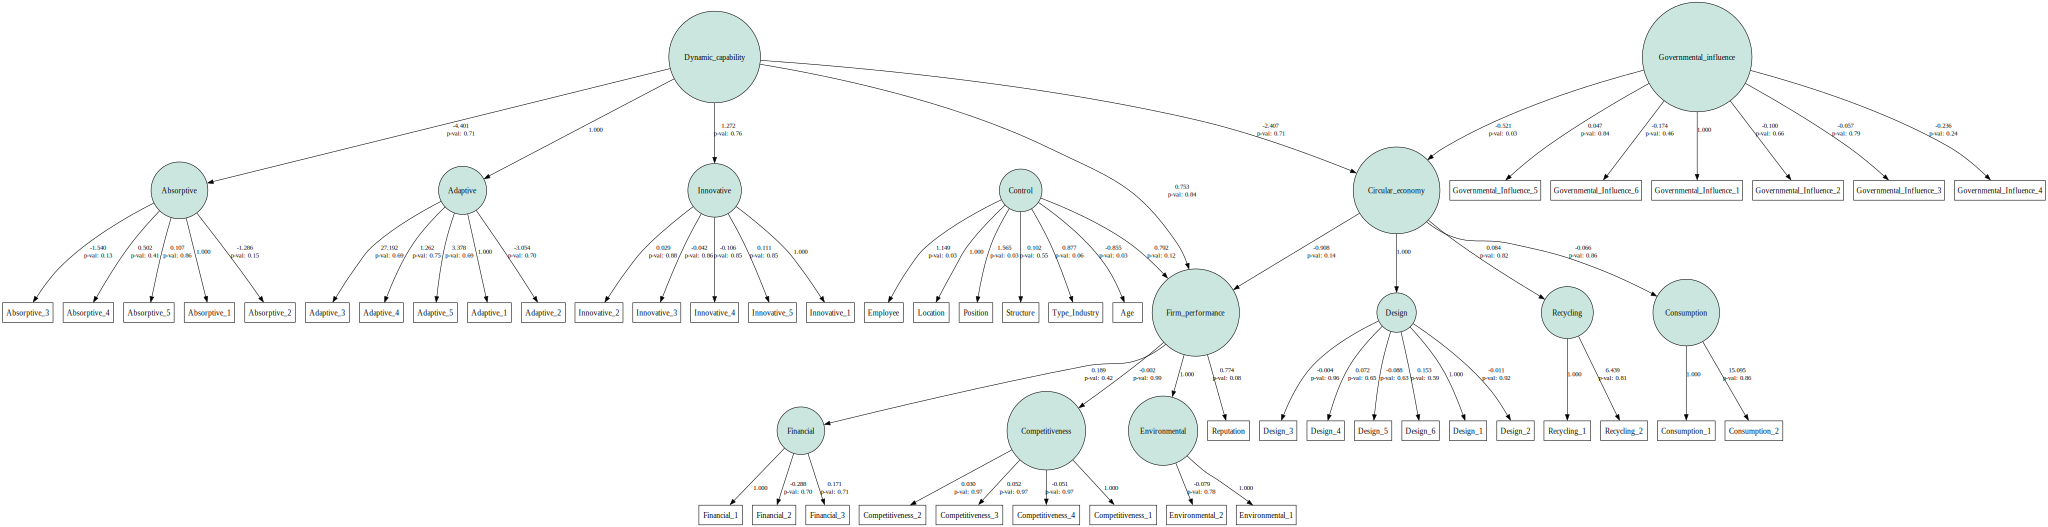

In [10]:
#Thefirststep from semopy import Model
model_description_1="""
                    Control =~ Location + Type_Industry + Employee + Age + Position + Structure
                    
                    Adaptive =~ Adaptive_1 + Adaptive_2 + Adaptive_3 + Adaptive_4 + Adaptive_5
                    Absorptive =~ Absorptive_1 + Absorptive_2 + Absorptive_3 + Absorptive_4 + Absorptive_5
                    Innovative =~ Innovative_1 + Innovative_2 + Innovative_3 + Innovative_4 + Innovative_5
                    Dynamic_capability =~ Adaptive + Absorptive + Innovative
                    
                    Environmental =~ Environmental_1 + Environmental_2
                    Financial =~ Financial_1 + Financial_2 + Financial_3
                    Competitiveness =~ Competitiveness_1 + Competitiveness_2 + Competitiveness_3 + Competitiveness_4                                    
                    Firm_performance =~ Environmental + Financial + Competitiveness + Reputation
                    
                    Governmental_influence =~ Governmental_Influence_1 + Governmental_Influence_2 + Governmental_Influence_2 + Governmental_Influence_3 + Governmental_Influence_4 + Governmental_Influence_5 + Governmental_Influence_6
                    
                    Design =~ Design_1 + Design_2 + Design_3 + Design_4 + Design_5 + Design_6
                    Consumption =~ Consumption_1 + Consumption_2
                    Recycling =~ Recycling_1 + Recycling_2
                    Circular_economy =~ Design + Consumption + Recycling
                    
                    Circular_economy ~ Dynamic_capability
                    Circular_economy ~ Governmental_influence
                    Dynamic_capability =~ Firm_performance
                    Circular_economy =~ Firm_performance
                    Control =~ Firm_performance
                  """

model=semopy.Model(model_description_1)

opt_res = model.fit(df)
print(opt_res)

estimates = model.inspect()
display(estimates)

display(semopy.calc_stats(model))

semopy.semplot(model, filename="model_v1.png", inspection=estimates)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 9.300
Number of iterations: 244
Params: 1.428 -0.408 -1.678 0.051 0.171 -5.937 0.169 -0.390 0.029 -0.042 -0.106 0.111 0.148 2.930 2.617 1.904 -4.059 -0.079 -0.146 0.089 0.030 0.052 -0.051 0.027 0.052 0.546 0.230 -0.490 -0.078 0.423 0.344 0.289 0.082 -1.524 -4.877 1.116 0.082 0.677 -17.274 18.094 -0.125 0.004 0.941 1.049 0.580 1.168 0.918 0.059 0.000 0.000 0.934 0.863 0.738 1.065 0.673 0.888 0.970 0.838 0.790 0.819 1.105 0.827 0.000 0.960 0.017 0.738 0.823 0.888 0.807 0.990 0.913 0.024 0.967 0.000 0.888 0.721 0.837 0.856 0.000 0.959 1.064 0.659 0.000 0.925 0.955 0.847 0.000 0.000 0.000 0.876 1.040 0.463 0.910 0.365 0.030 -0.030 0.171


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Adaptive,~,Dynamic_capability,1.000000e+00,-,-,-
1,Absorptive,~,Dynamic_capability,1.484053e-01,0.624173,0.237763,0.812065
2,Innovative,~,Dynamic_capability,2.930197e+00,2.276734,1.287018,0.198088
3,Firm_performance,~,Dynamic_capability,2.617031e+00,21214808.146411,0.0,1.0
4,Firm_performance,~,Governmental_influence,1.904219e+00,721764.429617,0.000003,0.999998
5,Firm_performance,~,Circular_economy,-4.058975e+00,169773489.141185,-0.0,1.0
6,Environmental,~,Firm_performance,1.000000e+00,-,-,-
7,Financial,~,Firm_performance,2.654740e-02,0.166724,0.15923,0.873488
8,Competitiveness,~,Firm_performance,5.185254e-02,0.163253,0.31762,0.750773
9,Design,~,Circular_economy,1.000000e+00,-,-,-


,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,764,820,929.987229,0.000033,1001.004898,0.082968,0.070946,0.002848,0.070946,0.015751,0.046846,175.400255,428.101763,9.299872


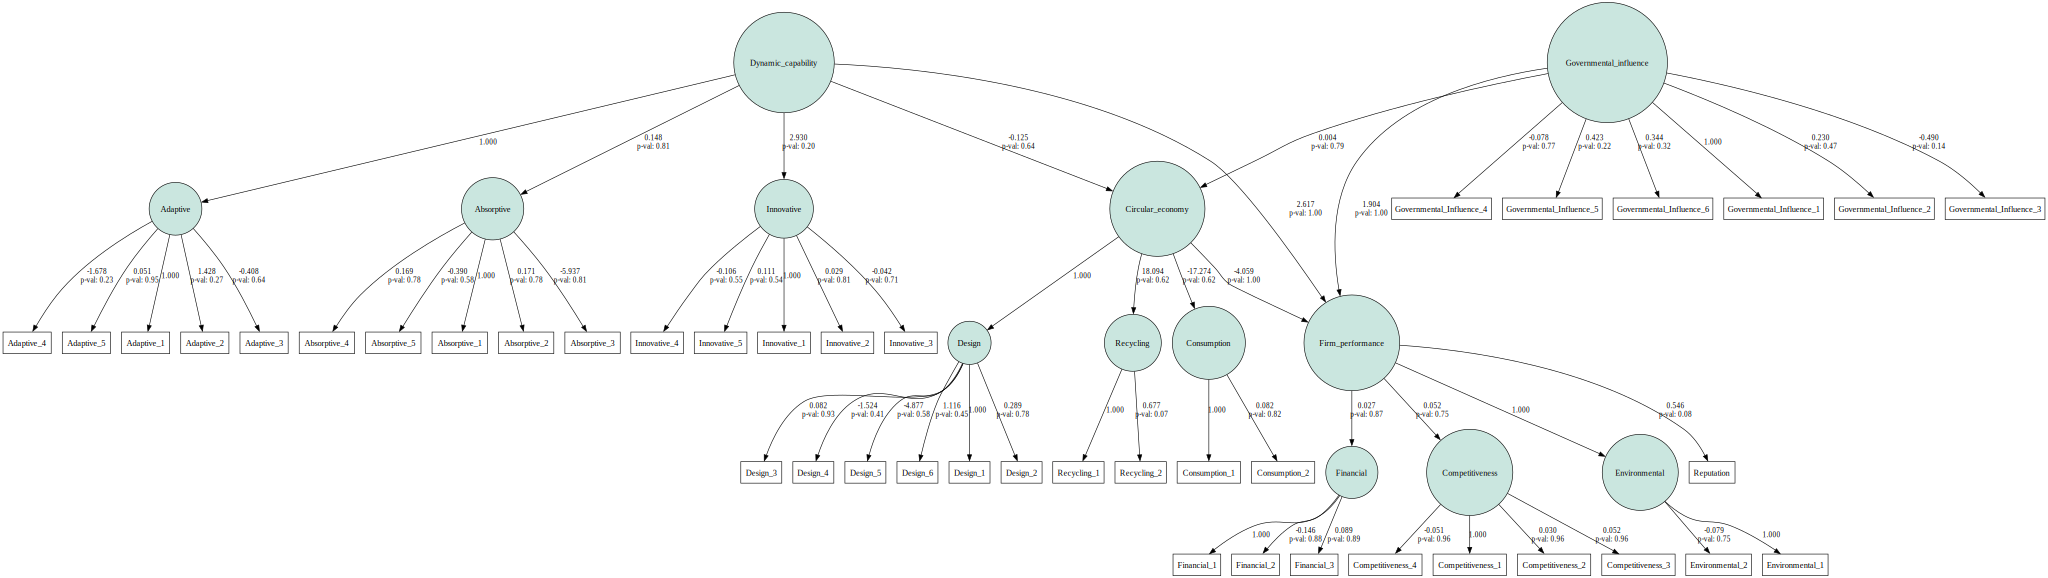

In [11]:
#Thefirststep from semopy import Model
model_description_2="""
                    Adaptive =~ Adaptive_1 + Adaptive_2 + Adaptive_3 + Adaptive_4 + Adaptive_5
                    Absorptive =~ Absorptive_1 + Absorptive_2 + Absorptive_3 + Absorptive_4 + Absorptive_5
                    Innovative =~ Innovative_1 + Innovative_2 + Innovative_3 + Innovative_4 + Innovative_5
                    Dynamic_capability =~ Adaptive + Absorptive + Innovative
                    
                    Environmental =~ Environmental_1 + Environmental_2
                    Financial =~ Financial_1 + Financial_2 + Financial_3
                    Competitiveness =~ Competitiveness_1 + Competitiveness_2 + Competitiveness_3 + Competitiveness_4                                    
                    Firm_performance =~ Environmental + Financial + Competitiveness + Reputation
                    
                    Governmental_influence =~ Governmental_Influence_1 + Governmental_Influence_2 + Governmental_Influence_2 + Governmental_Influence_3 + Governmental_Influence_4 + Governmental_Influence_5 + Governmental_Influence_6
                    
                    Design =~ Design_1 + Design_2 + Design_3 + Design_4 + Design_5 + Design_6
                    Consumption =~ Consumption_1 + Consumption_2
                    Recycling =~ Recycling_1 + Recycling_2
                    Circular_economy =~ Design + Consumption + Recycling
                    
                    Circular_economy ~ Dynamic_capability
                    Circular_economy ~ Governmental_influence
                    Dynamic_capability =~ Firm_performance
                    Circular_economy =~ Firm_performance
                    Governmental_influence =~ Firm_performance
                  """

model=semopy.Model(model_description_2)

opt_res = model.fit(df)
print(opt_res)

estimates = model.inspect()
display(estimates)

display(semopy.calc_stats(model))
semopy.semplot(model, filename="model_v2.png", inspection=estimates)